Part 1:  6051
Part 2:  5093


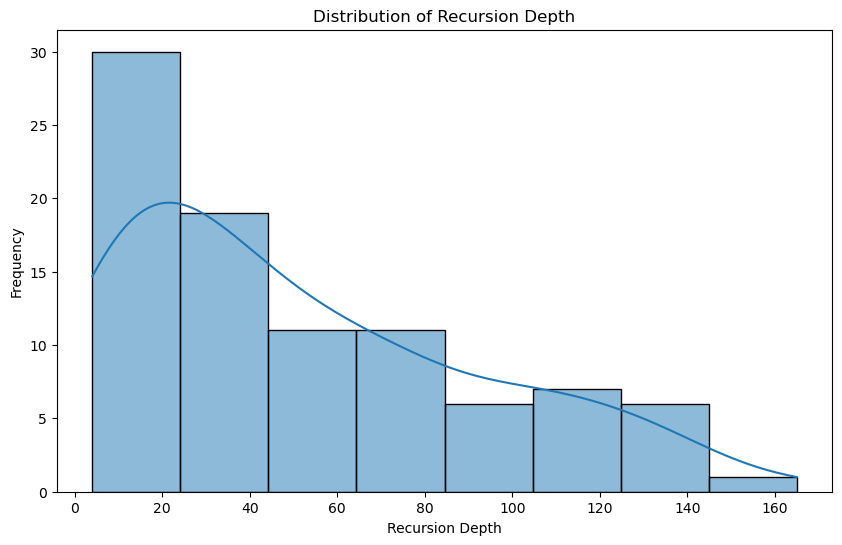

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
import numpy as np
from itertools import pairwise
import seaborn as sns
from matplotlib import pyplot as plt

test = "testinput.txt"
prod = "input.txt"

def FindItem(List, item):
    return [element for element in List if item in element] or [["", ""]]

def CheckCorrect(instruction):
    # [75, 47, 61, 53, 29]
    for number in instruction: # eg. "45"
        rules = FindItem(Rules, number) # List of all rules containing number
        for N1, N2 in rules:
            # N1 is printed before N2, so N1 < N2 
            if N2 in instruction:
                # Get index of N1 and N2 in print_instrucion
                IndexN1 = instruction.index(N1)  
                IndexN2 = instruction.index(N2)  
                # print(IndexN1, IndexN2)

                if IndexN1 > IndexN2:
                    return False
    return True
# Runs in 5 seconds

# OPTIMIZATION
def CheckCorrect2(instruction, rule_dict):
    # For each number in instruction:
    # [75, 47, 61, 53, 29]
    for number in instruction:
        # Check if number is key in ruledict:
        if number in rule_dict:
            # Now, for each number that should come after this one:
            for N2 in rule_dict[number]:
                # Check if N2 really comes after current number:
                if N2 in instruction and instruction.index(N2) < instruction.index(number):
                    return False
    return True
# Runs in 0.0 seconds          
# Sorting will be much faster now!


def SortInstruction(instruction, rule_dict, depth = 0):
    # 0. Check if still not sorted correctly
    if CheckCorrect2(instruction, rule_dict):
        return instruction, depth # if correct, end recursion and return out
    
    # 1. Find first incorrect pair and swap order
    for number in instruction:
        if number in rule_dict:
            # Now, for each number that should come after this one:
            for N2 in rule_dict[number]:
                if N2 in instruction:
                    # Check if N2 really comes after current number:
                    I1 = instruction.index(number)
                    I2 = instruction.index(N2)
                    
                    if I2 < I1:
                        # Swap order
                        tmp = instruction[I2]
                        instruction[I2] = instruction[I1]    
                        instruction[I1] = tmp     

                        return SortInstruction(instruction, rule_dict, depth + 1) # Recursive call # [97, 61, 53, 29, 13]


### PREPARE DATA ###
data = open(prod, "r").read().split("\n\n")

# Extract data into array and also convert everything to integers because thats easier to work with
Rules = np.array([line.split("|") for line in data[0].split("\n")], dtype = int)
Prints = [[int(num) for num in pages.split(",")] for pages in data[1].split("\n")]

# Prepare rules into dict, so we only loop over them once
ruledict = {}
for N1, N2 in Rules:
    if N1 not in ruledict:
        ruledict[N1] = [] # Create new key 
    ruledict[N1].append(N2) # Page N2 always comes after page N1

### PART 1 ###
ValidCenters = []
for print_instruction in Prints:    
    # If correct, add to list of correctly sorted pages
    if CheckCorrect2(print_instruction, ruledict):
        ValidCenters.append(print_instruction[len(print_instruction)//2])
    
print("Part 1: ", np.sum(ValidCenters))

### PART 2 ###
# Sort the remainder of incorrectly sorted pages

SortedMiddlePages = []
Recursion_depth = []

for print_instruction in Prints:    
    # 1. Check if set is incorrectly sorted
    if not CheckCorrect2(print_instruction, ruledict):
        sorted_instruction, depth = SortInstruction(print_instruction, ruledict)

        SortedMiddlePages.append(sorted_instruction[len(print_instruction) // 2])
        Recursion_depth.append(depth)

print("Part 2: ", np.sum(SortedMiddlePages))

# Plot distribution of recursion depth
plt.figure(figsize=(10, 6))
sns.histplot(Recursion_depth, kde = True)
plt.xlabel('Recursion Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Recursion Depth')
plt.show()

In [156]:
from itertools import pairwise

def ultimate(pravila, testi, i):
    if i == 1:
        testi = [uredi_vejice(testi)]
    skup_sredine = []
    nepravilne = []
    for t in testi:
        t_j = bool(t)
        for e1, e2 in pairwise(t.split(",")):
            if t and f"{e1}|{e2}" in pravila:
                t_j = 1
            else:
                t_j = 0
                nepravilne.append(t)
                break
        if t_j:
            mid = len(t.split(",")) // 2
            skup_sredine.append(int(t.split(",")[mid]))

    return nepravilne #sum(skup_sredine) #

def poprava_nepravilnih(pravila, testi):
    skup_napacnih_sredin = []
    nepravilne = ultimate(pravila, testi, 0)
    popravljene = []
    for n in nepravilne:
        while ultimate(pravila, [n], 1):
            for e1, e2 in pairwise(n.split(",")):
                if n and f"{e1}|{e2}" not in pravila:
                    try:
                        popravilo_n = (
                            f"{n[:n.index(e1)].rstrip(',')},"
                            f"{e2},{e1},"
                            f"{n[(n.index(e2)+len(e2)):].lstrip(',')}"
                        )
                        print(f"Before: {n}")
                        n = uredi_vejice([popravilo_n])
                        print(f"After : {n}")
                    except ValueError:
                        break
        else:
            popravljene.append(n)
            continue

    # for pop_c in popravljene:
    #     k = [b for b in pop_c.split(",") if b]
    #     mid = len(k) // 2
    #     skup_napacnih_sredin.append(int(k[mid]))
    # return sum(skup_napacnih_sredin)

def uredi_vejice(tt):
    t = tt[0]
    t = t.strip(",")  # Odstrani začetne in končne vejice
    t = ",".join(filter(None, t.split(",")))  # Odstrani prazne elemente med vejicami
    return t

def odpri_preberi():
    pravila = []
    testi = []
    odpri = open("message.txt", "r").read().split("-")   # V txt je potrebno dodati presledek
    for o in odpri[0].splitlines():
        pravila.append(o)
    for o in odpri[1].splitlines():
        testi.append(o)
    return pravila, testi

prav, test = odpri_preberi()

print(prav)
print(test)

print(poprava_nepravilnih(prav, test))



['75|21', '28|29', '28|73', '95|48', '95|19', '95|16', '81|51', '81|95', '81|16', '81|56', '48|59', '48|83', '48|64', '48|57', '48|86', '15|43', '15|82', '15|49', '15|31', '15|35', '15|48', '83|68', '83|26', '83|56', '83|63', '83|64', '83|69', '83|84', '47|83', '47|29', '47|23', '47|18', '47|87', '47|53', '47|79', '47|59', '35|43', '35|34', '35|85', '35|28', '35|64', '35|94', '35|48', '35|79', '35|78', '34|65', '34|88', '34|87', '34|82', '34|45', '34|76', '34|47', '34|39', '34|49', '34|85', '92|15', '92|35', '92|59', '92|69', '92|34', '92|67', '92|26', '92|18', '92|73', '92|84', '92|19', '94|47', '94|83', '94|82', '94|85', '94|57', '94|48', '94|64', '94|28', '94|43', '94|76', '94|49', '94|88', '29|59', '29|51', '29|15', '29|73', '29|89', '29|66', '29|76', '29|75', '29|63', '29|53', '29|18', '29|62', '29|95', '69|94', '69|56', '69|66', '69|43', '69|85', '69|63', '69|82', '69|57', '69|78', '69|15', '69|34', '69|31', '69|35', '69|16', '63|78', '63|65', '63|43', '63|27', '63|66', '63|23', 